# Star Wars Fans Speak: Analyzing Movie Preferences and Gender Differences

This project aims to explore the Star Wars movies fanbase and answer key questions regarding their preferences. To reach this goal, we utilized data collected by FiveThirtyEight through SurveyMonkey.

After analyzing the data, we discovered some interesting findings. Firstly, 'The Empire Strikes Back' was the clear favorite among all Star Wars movies. Secondly, the original trilogy was more popular among respondents than the newer trilogy, with 'The Phantom Menace' being the most watched of the newer movies. Thirdly, male respondents were more likely to have seen all the movies compared to female respondents who mainly watched the original trilogy. Lastly, both male and female respondents equally favored 'The Empire Strikes Back' while showing a dislike for the newer trilogy.

These results provide insights into the preferences of the Star Wars fanbase and highlight the enduring popularity of the original trilogy. The concise and straightforward presentation of our findings will make our project an accessible and informative read for employers.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np

### Reading the data

In [2]:
star_wars = pd.read_csv('StarWars.csv', encoding='ISO-8859-1')
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: E

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

### Converting columns to boolean

We will convert all columns containing only Yes/No (and NaN) responses to Boolean for further analysis.

In [4]:
# Storing all Yes/No columns' labels as a list
yes_no_cols = ['Have you seen any of the 6 films in the Star Wars franchise?',
              'Do you consider yourself to be a fan of the Star Wars film franchise?',
              'Are you familiar with the Expanded Universe?', 
               'Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½',
               'Do you consider yourself to be a fan of the Star Trek franchise?']

# Changing Yes/No to True/False
for col in yes_no_cols:
    star_wars[col] = star_wars[col].map({'Yes':True, 'No':False})
star_wars[yes_no_cols]

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?
0,NaN,NaN,NaN,NaN,NaN
1,True,True,True,False,False
2,False,NaN,NaN,NaN,True
3,True,False,False,NaN,False
4,True,True,False,NaN,True
...,...,...,...,...,...
1182,True,True,False,NaN,True
1183,True,True,False,NaN,True
1184,False,NaN,NaN,NaN,False
1185,True,True,False,NaN,True


Next, we will change the columns that answer the question "Which of the following Star Wars films have you seen? Please select all that apply" to boolean and rename them accordingly.

In [5]:
# Renaming the columns to seen_1 - seen_6
for n, col in zip(range(1,7), star_wars.columns[3:9]):
                      star_wars.rename(columns={col:('seen_'+str(n))}, inplace=True)
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½',
       'D

In [6]:
# Changing the values to True if the respondent have seen the movie, or False otherwise
star_wars.iloc[:,3:9] = star_wars.iloc[:,3:9].replace(to_replace=star_wars.iloc[0,3:9], value=True)
star_wars.iloc[:,3:9] = star_wars.iloc[:,3:9].replace(to_replace=np.NaN, value=False)
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,NaN,True,True,True,True,True,True,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,NaN,NaN,NaN,Response,Response,Response,Response,Response
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,3.288389e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,Han,False,NaN,True,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1183,3.288379e+09,True,True,True,True,True,True,True,True,4,...,Very favorably,I don't understand this question,False,NaN,True,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1184,3.288375e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,False,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1185,3.288373e+09,True,True,True,True,True,True,True,True,4,...,Very favorably,Han,False,NaN,True,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


The next six columns ask respondents to rank the Star Wars films from least to most favourite. 1 means the film was the most favourite and 6 means it was the least favourite.

We will convert the columns to numeric and rename them.

In [7]:
# Converting to float
star_wars.iloc[1:,9:15] = star_wars.iloc[1:,9:15].astype(float)
star_wars.iloc[1:,9:15]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1182,5.0,4.0,6.0,3.0,2.0,1.0
1183,4.0,5.0,6.0,2.0,3.0,1.0
1184,NaN,NaN,NaN,NaN,NaN,NaN
1185,4.0,3.0,6.0,5.0,2.0,1.0


In [8]:
# Renaming the columns to ranking_1 - ranking_6
for n, col in zip(range(1,7), star_wars.columns[9:15]):
                      star_wars.rename(columns={col:('ranking_'+str(n))}, inplace=True)
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'

## Finding the highest ranking movie

Now we can find the highest ranked film by calculating the average of each ranking column.

In [9]:
ranking = star_wars.iloc[1:,9:15].mean()
ranking

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

We will plot the results for better visualization.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
import matplotlib.style as style
style.use('fivethirtyeight') # we will use fivethirtyeight style for the graphs

In [12]:
sw_movies = ['The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith',
          'New Hope', 'The Empire Strikes Back', 'Return of the Jedi']

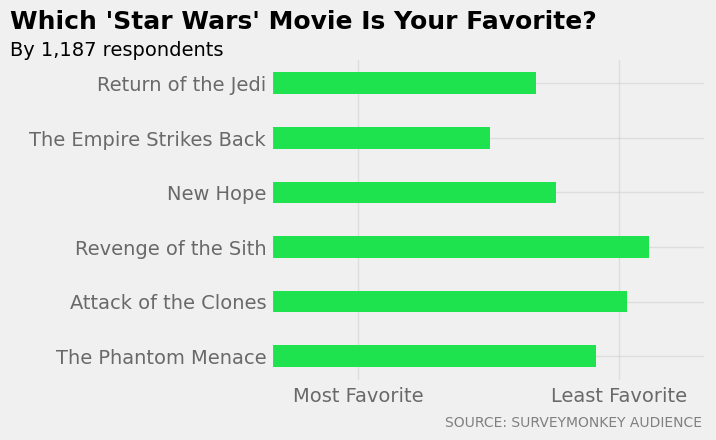

In [13]:
# Plotting the results
fig, ax = plt.subplots(figsize=(5,4), alpha=0.1)

# Creating a barh plot
ax.barh(sw_movies, ranking.array, color='#1ee34f', height=0.4)

# Setting tick parameters
ax.tick_params(axis="both", colors="dimgray")

# Setting min and max for x axis
ax.set_xlim(0,5)

# Renaming x ticks
ax.set_xticks([1, 4], ['Most Favorite', 'Least Favorite'])

# Setting the grid transparency
ax.grid(alpha=0.5)

# Adding title
ax.text(-3, 6, "Which 'Star Wars' Movie Is Your Favorite?", weight='bold', size=18)

# Adding subtitle
ax.text(-3, 5.5, 'By 1,187 respondents')

# Adding source
ax.text(2, -1.3, 'SOURCE: SURVEYMONKEY AUDIENCE', size=10, color='grey')

plt.show()

'The Empire Strikes Back' is by far the most popular film in the Star Wars saga.

## Finding the most viewed movie

We will find which movie was viewed the most by calculating the mean of seen_1-6 columns

In [14]:
views = star_wars.iloc[:,3:9].mean()
views = round(views*100, 1)
views

seen_1    56.8
seen_2    48.2
seen_3    46.4
seen_4    51.2
seen_5    63.9
seen_6    62.3
dtype: float64

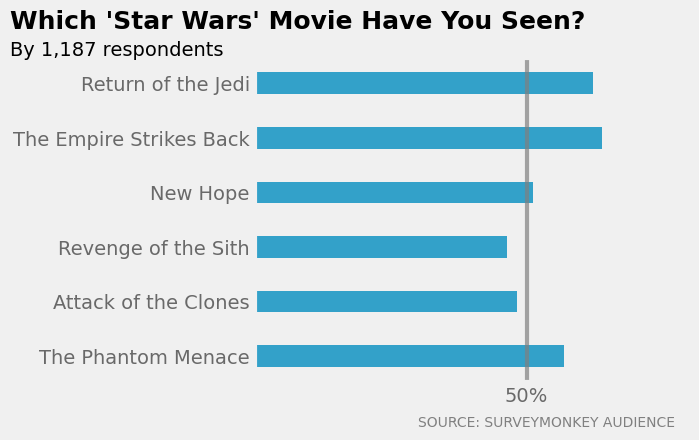

In [15]:
# Plotting the results
fig, ax = plt.subplots(figsize=(5,4), alpha=0.1)

# Creating a barh plot
ax.barh(sw_movies, views.array, color='#33A1C9', height=0.4)

# Setting tick parameters
ax.tick_params(axis="both", colors="dimgray")

# Setting min and max for x axis
ax.set_xlim(0,80)

# Renaming x ticks
ax.set_xticks([50], ['50%'])

# Drawing a line at the 50% level
ax.axvline(x=50, c='grey', alpha=0.7, linewidth=3)

# Setting the grid transparency
ax.grid(alpha=0)

# Adding title
ax.text(-45, 6, "Which 'Star Wars' Movie Have You Seen?", weight='bold', size=18)

# Adding subtitle
ax.text(-45, 5.5, 'By 1,187 respondents')

# Adding source
ax.text(30, -1.3, 'SOURCE: SURVEYMONKEY AUDIENCE', size=10, color='grey')

plt.show()

Nearly two-thirds of all respondents have seen 'The Empire Strikes Back' and/or 'Return of the Jedi' from the original trilogy, while only 'The Phantom Menace' (the first of the new trilogy) was more likely to have been seen than not.

## Exploring the Data by Gender

We will separate the dataset into male and female respondents and compare the results for highest views and highest ranks between them.

In [16]:
# Separating the data sets
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

females.shape, males.shape

((549, 38), (497, 38))

In [17]:
# Calculating views for males
views_m = males.iloc[:,3:9].mean()
views_m = round(views_m*100, 1)
views_m

seen_1    72.6
seen_2    65.0
seen_3    63.8
seen_4    68.8
seen_5    78.9
seen_6    77.9
dtype: float64

In [18]:
# Calculating views for females
views_f = -females.iloc[:,3:9].mean()
views_f = round(views_f*100, 1)
views_f

seen_1   -54.3
seen_2   -43.2
seen_3   -40.4
seen_4   -46.4
seen_5   -64.3
seen_6   -61.6
dtype: float64

In [19]:
# Calculating rankings for males
ranking_m = males.iloc[1:,9:15].mean()
ranking_m

ranking_1    4.040284
ranking_2    4.229858
ranking_3    4.282660
ranking_4    2.995261
ranking_5    2.452607
ranking_6    2.995261
dtype: float64

In [20]:
# Calculating rankings for females
ranking_f = -females.iloc[1:,9:15].mean()
ranking_f

ranking_1   -3.435443
ranking_2   -3.954545
ranking_3   -4.416667
ranking_4   -3.537879
ranking_5   -2.570707
ranking_6   -3.078283
dtype: float64

We will now compare the views of men and women.

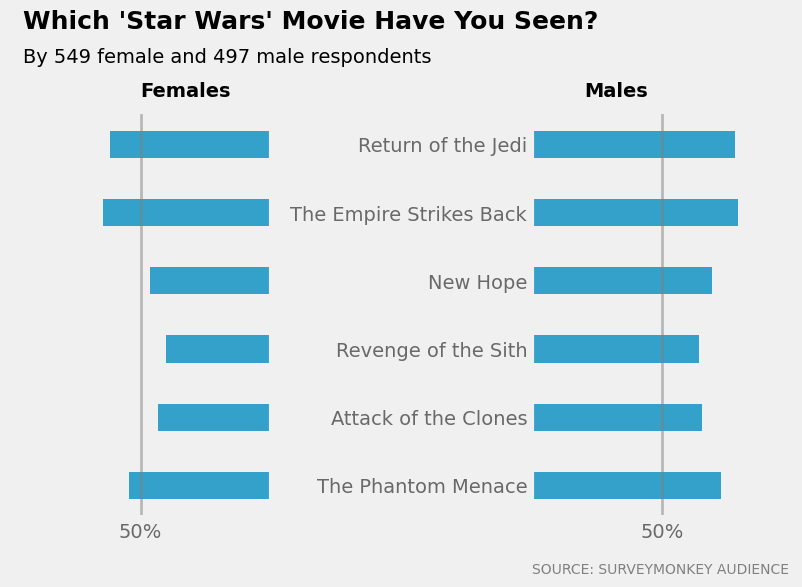

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,5))

# Creating a barh plots
ax2.barh(sw_movies, views_m.array, height=0.4, color='#33A1C9')
ax1.barh(sw_movies, views_f.array, height=0.4, color='#33A1C9')

# Setting grid visibility
ax2.grid(visible=None)
ax1.grid(visible=None)

# Setting tick parameters
ax2.tick_params(axis="both", colors="dimgray")
ax1.tick_params(axis="both", colors="dimgray")

# Setting y ticks for subplot1 invisible
ax1.set_yticks([""])

# Setting min and max for x axis
ax1.set_xlim(-100,0)
ax2.set_xlim(0,100)

# Renaming x ticks
ax1.set_xticks([-50], ['50%'])
ax2.set_xticks([50], ['50%'])

# Adjusting the space between subplots
plt.subplots_adjust(wspace=1)

# Drawing a line at the 50% level
ax1.axvline(x=-50, c='grey', alpha=0.5, linewidth=2)
ax2.axvline(x=50, c='grey', alpha=0.5, linewidth=2)

# Adding title
ax1.text(-95, 6.7, "Which 'Star Wars' Movie Have You Seen?", weight='bold', size=18)

# Adding subtitle
ax1.text(-95, 6.2, 'By 549 female and 497 male respondents')

# Adding gender subtitle
ax1.text(-50, 5.7, "Females", weight='bold')
ax1.text(120, 5.7, "Males", weight='bold')

# Adding source
ax1.text(100, -1.3, 'SOURCE: SURVEYMONKEY AUDIENCE', size=10, color='grey')

plt.show()

While most female respondents have only seen the original trilogy, most male respondents have seen all the films.

We now plot the rankings by gender.

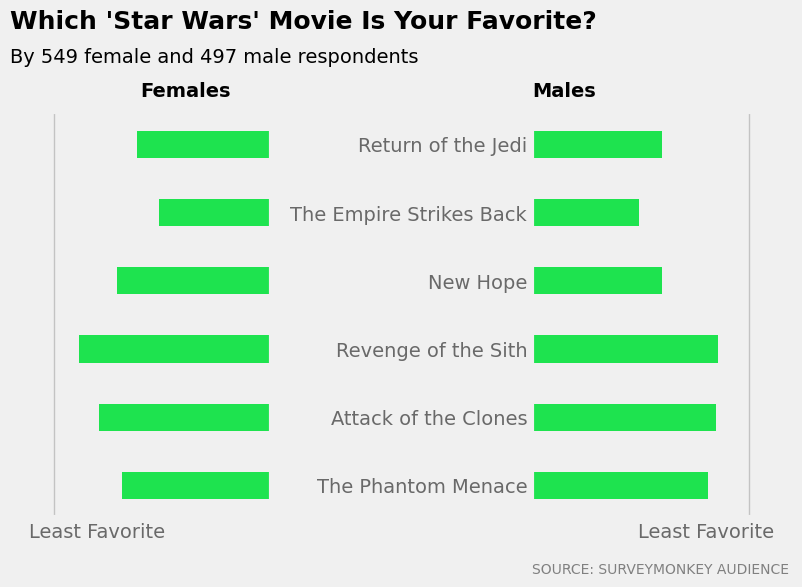

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,5))

# Creating a barh plots
ax2.barh(sw_movies, ranking_m.array, height=0.4, color='#1ee34f')
ax1.barh(sw_movies, ranking_f.array, height=0.4, color='#1ee34f')

# Setting grid visibility
ax2.grid(visible=None)
ax1.grid(visible=None)

# Setting tick parameters
ax2.tick_params(axis="both", colors="dimgray")
ax1.tick_params(axis="both", colors="dimgray")

# Setting y ticks for subplot1 invisible
ax1.set_yticks([""])

# Setting min and max for x axis
ax1.set_xlim(-6,0)
ax2.set_xlim(0,6)

# Renaming x ticks
ax1.set_xticks([-4], ['Least Favorite'])
ax2.set_xticks([4], ['Least Favorite'])

# Adjusting the space between subplots
plt.subplots_adjust(wspace=1)

# Drawing lines
ax1.axvline(x=-5, c='grey', alpha=0.4, linewidth=1)
ax2.axvline(x=5, c='grey', alpha=0.4, linewidth=1)

# Adding title
ax1.text(-6, 6.7, "Which 'Star Wars' Movie Is Your Favorite?", weight='bold', size=18)

# Adding subtitle
ax1.text(-6, 6.2, 'By 549 female and 497 male respondents')

# Adding gender subtitle
ax1.text(-3, 5.7, "Females", weight='bold')
ax1.text(6, 5.7, "Males", weight='bold')

# Adding source
ax1.text(6, -1.3, 'SOURCE: SURVEYMONKEY AUDIENCE', size=10, color='grey')

plt.show()

It seems that respondents of both sexes liked The Empire Strikes Back and disliked the new trilogy.

## Conclusion

Our project aimed to investigate the Star Wars movies fanbase and answer key questions regarding their preferences. We utilized data collected by FiveThirtyEight through SurveyMonkey and analyzed and visualized the results to find interesting patterns.

Our findings showed that 'The Empire Strikes Back' was the clear favorite among all Star Wars movies, while the original trilogy was more popular among respondents than the newer trilogy. Male respondents were more likely to have seen all the movies compared to female respondents, who mainly watched the original trilogy. Additionally, both male and female respondents equally favored 'The Empire Strikes Back' while showing a dislike for the newer trilogy.

Overall, our analysis provides valuable insights into the preferences of the Star Wars fanbase, highlighting the enduring popularity of the original trilogy and the dominance of 'The Empire Strikes Back'. Our approach involved analyzing and visualizing the data, and through this process, we gained a better understanding of the fanbase's tastes and interests. These findings will be useful for businesses and organizations that want to understand the preferences of Star Wars fans and tailor their products accordingly.